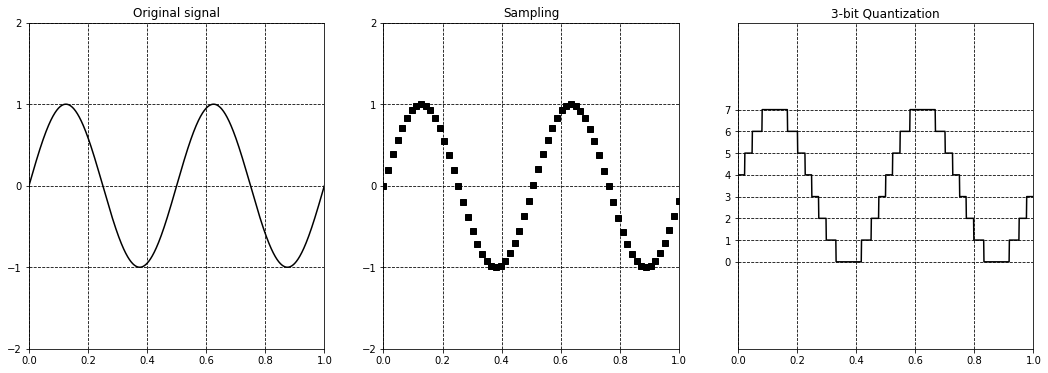

In [0]:
# Sampling vs quantization

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
plt.rcParams['figure.figsize'] = [18, 6]

plt.figure()
# ---
ct_x = np.linspace(0.0, 1.0, 1024)
ct_y = np.sin(ct_x * 4 * np.pi)
ax = plt.subplot(1, 3, 1)
ax.set_xlim(0, 1)
ax.set_yticks(np.linspace(-2 ,2, 5))
ax.set_ylim(-2, 2)
ax.grid(color='k', linestyle='--')
ax.set_title("Original signal")
ax.plot(ct_x, ct_y, 'k')
# ---
ax = plt.subplot(1, 3, 2)
ax.set_xlim(0, 1)
ax.set_yticks(np.linspace(-2 ,2, 5))
ax.set_ylim(-2, 2)
ax.grid(color='k', linestyle='--')
ax.set_title("Sampling")
ax.plot(np.linspace(0.0, 1.0, 64), ct_y[0:1024:16], 'ks')
# ---
ax = plt.subplot(1, 3, 3)
ax.set_xlim(0, 1)
ax.set_ylim(-4, 11)
ax.set_yticks(np.linspace(0 ,7, 8))
ax.grid(color='k', linestyle='--')
ax.set_title("3-bit Quantization")
ax.plot(ct_x, np.round((ct_y + 1.0) * 3.5), 'k')
# ---
plt.show()


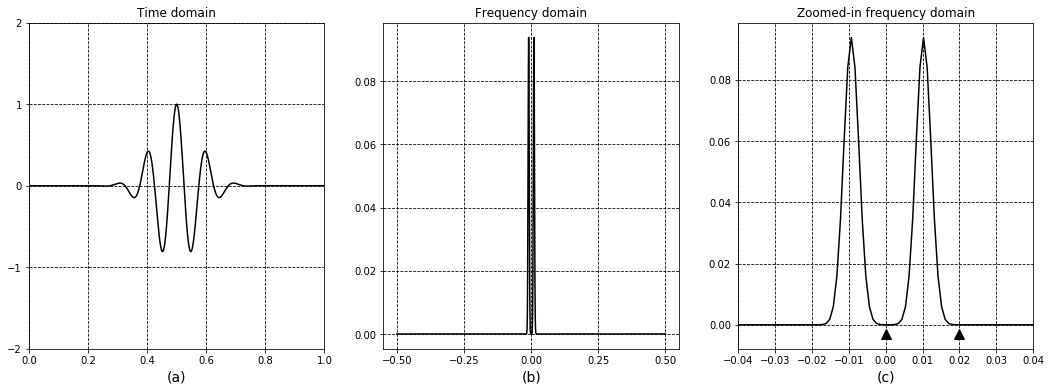

In [0]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

plt.rcParams['figure.figsize'] = [18, 6]

NUM_ROWS = 1
NUM_COLS = 3
LEN = 1024

plt.figure()

# ------
ct_x = np.linspace(0.0, 1.0, num=LEN, endpoint=False)
ct_y = signal.gausspulse(ct_x - 0.5, fc=10)
band_start = -0.02
band_stop = 0.02

ax = plt.subplot(NUM_ROWS, NUM_COLS, 1)
ax.set_xlim(0, 1)
ax.set_ylim(-2, 2)
ax.set_yticks([-2, -1, 0, 1, 2])
ax.grid(color='k', linestyle='--')
ax.set_title('Time domain')
ax.set_xlabel("(a)", fontsize=14)
# 
ax.plot(ct_x, ct_y, 'k')

# ------
ct_fft = np.fft.fftshift(np.fft.fft(ct_y))
fft_x = np.linspace(-0.5, 0.5, LEN)

ax = plt.subplot(NUM_ROWS, NUM_COLS, 2)
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
ax.grid(color='k', linestyle='--')
ax.set_title('Frequency domain')
ax.set_xlabel("(b)", fontsize=14)
# 
ax.plot(fft_x, np.abs(ct_fft) / LEN, 'k')

# ------
ax = plt.subplot(NUM_ROWS, NUM_COLS, 3)
ax.set_xlim(-0.04, 0.04)
ax.grid(color='k', linestyle='--')
ax.set_title('Zoomed-in frequency domain')
ax.set_xlabel("(c)", fontsize=14)
# 
ax.plot(fft_x, np.abs(ct_fft) / LEN, 'k')
ax.plot(0, -0.003, 'k^', markersize=10)
ax.plot(band_stop, -0.003, 'k^', markersize=10)

plt.show()


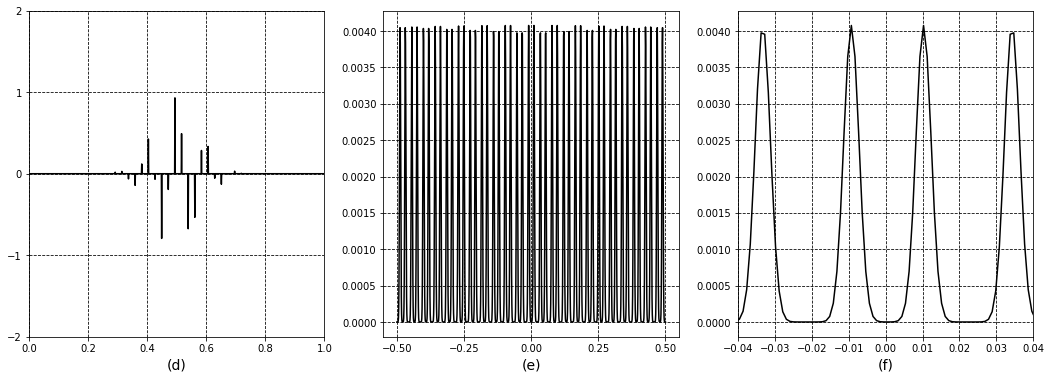

In [0]:
SAMPLING_FREQ = 0.043
SAMPLING_PERIOD = int(1.0/SAMPLING_FREQ)

plt.figure()

# ------
sample_train = np.full(LEN, 0)
sample_train[::SAMPLING_PERIOD] = 1
dt_y = ct_y * sample_train

ax = plt.subplot(NUM_ROWS, NUM_COLS, 1)
ax.set_xlim(0, 1)
ax.set_ylim(-2, 2)
ax.set_yticks([-2, -1, 0, 1, 2])
ax.grid(color='k', linestyle='--')
ax.set_xlabel("(d)", fontsize=14)
# 
ax.plot(ct_x, dt_y, 'k')

# ------
dt_fft = np.fft.fftshift(np.fft.fft(dt_y))

ax = plt.subplot(NUM_ROWS, NUM_COLS, 2)
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
ax.grid(color='k', linestyle='--')
ax.set_xlabel("(e)", fontsize=14)
# 
ax.plot(fft_x, np.abs(dt_fft) / LEN, 'k')

# ------
ax = plt.subplot(NUM_ROWS, NUM_COLS, 3)
ax.set_xlim(-0.04, 0.04)
ax.grid(color='k', linestyle='--')
ax.set_xlabel("(f)", fontsize=14)
# 
ax.plot(fft_x, np.abs(dt_fft) / LEN, 'k')

plt.show()


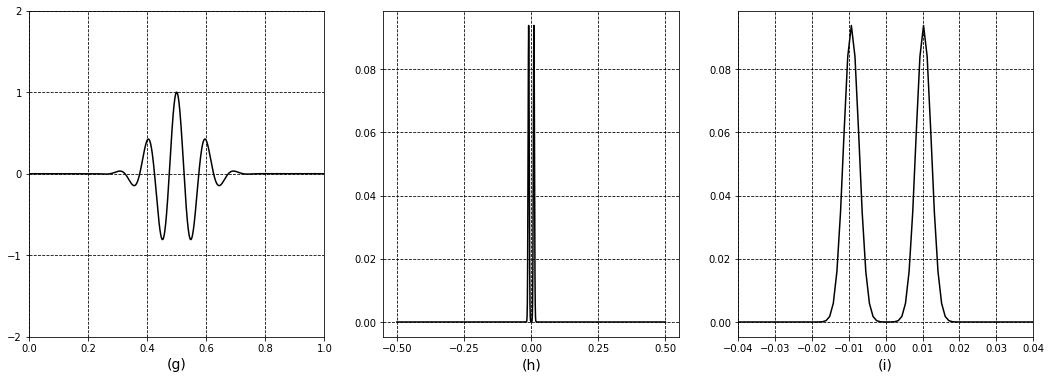

In [0]:
plt.figure()

# ------
dt_fft_low_pass = dt_fft * SAMPLING_PERIOD
dt_fft_low_pass[0:int(LEN/2) + int(band_start * LEN)] = 0
dt_fft_low_pass[int(LEN/2)+ int(band_stop * LEN):] = 0

ax = plt.subplot(NUM_ROWS, NUM_COLS, 2)
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
ax.grid(color='k', linestyle='--')
ax.set_xlabel("(h)", fontsize=14)
# 
ax.plot(fft_x, np.abs(dt_fft_low_pass) / LEN, 'k')

# ------
ax = plt.subplot(NUM_ROWS, NUM_COLS, 3)
ax.set_xlim(-0.04, 0.04)
ax.grid(color='k', linestyle='--')
ax.set_xlabel("(i)", fontsize=14)
# 
ax.plot(fft_x, np.abs(dt_fft_low_pass) / LEN, 'k')

# ------
ct_y_low_pass = np.fft.ifft(np.fft.fftshift(dt_fft_low_pass))

ax = plt.subplot(NUM_ROWS, NUM_COLS, 1)
ax.set_xlim(0, 1)
ax.set_ylim(-2, 2)
ax.set_yticks([-2, -1, 0, 1, 2])
ax.grid(color='k', linestyle='--')
ax.set_xlabel("(g)", fontsize=14)
# 
ax.plot(ct_x, np.real(ct_y_low_pass), 'k')

# ------
plt.show()

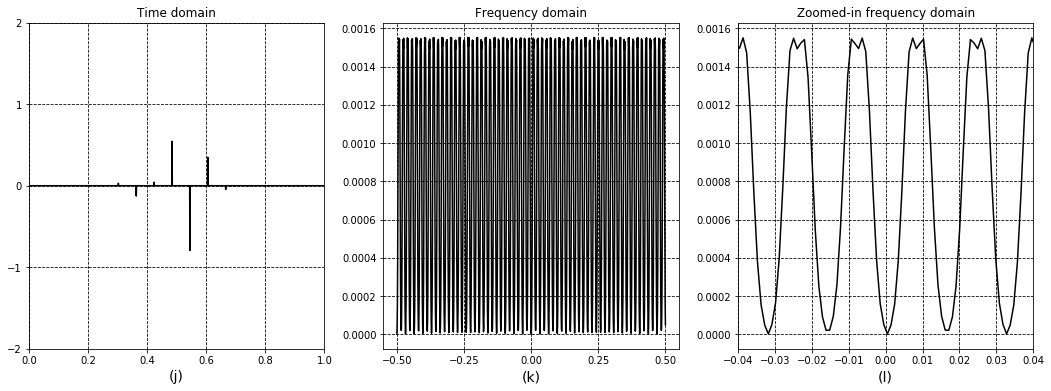

In [0]:
SAMPLING_FREQ = 0.016
SAMPLING_PERIOD = int(1.0/SAMPLING_FREQ)

plt.figure()

# ------
sample_train = np.full(LEN, 0)
sample_train[::SAMPLING_PERIOD] = 1
dt_y = ct_y * sample_train

ax = plt.subplot(NUM_ROWS, NUM_COLS, 1)
ax.set_xlim(0, 1)
ax.set_ylim(-2, 2)
ax.set_yticks([-2, -1, 0, 1, 2])
ax.grid(color='k', linestyle='--')
ax.set_xlabel("(j)", fontsize=14)
ax.set_title('Time domain')
# 
ax.plot(ct_x, dt_y, 'k')

# ------
dt_fft = np.fft.fftshift(np.fft.fft(dt_y))

ax = plt.subplot(NUM_ROWS, NUM_COLS, 2)
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
ax.grid(color='k', linestyle='--')
ax.set_title('Frequency domain')
ax.set_xlabel("(k)", fontsize=14)
# 
ax.plot(fft_x, np.abs(dt_fft) / LEN, 'k')

# ------
ax = plt.subplot(NUM_ROWS, NUM_COLS, 3)
ax.set_xlim(-0.04, 0.04)
ax.grid(color='k', linestyle='--')
ax.set_title('Zoomed-in frequency domain')
ax.set_xlabel("(l)", fontsize=14)
# 
ax.plot(fft_x, np.abs(dt_fft) / LEN, 'k')

plt.show()


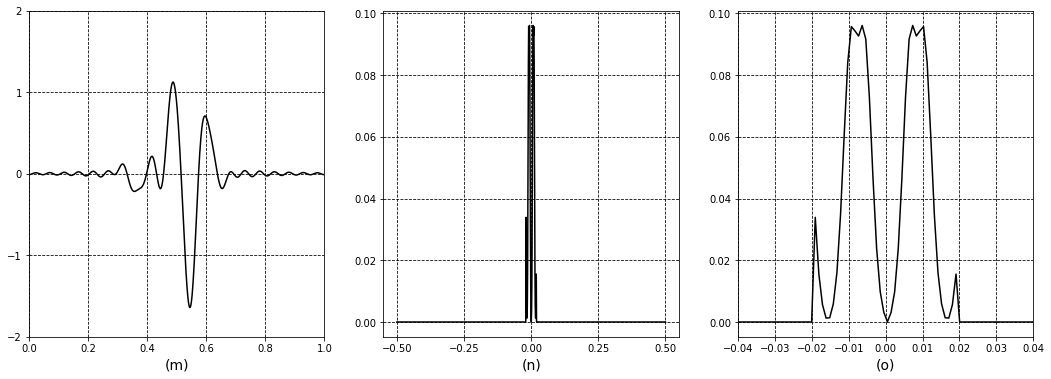

In [0]:
plt.figure()

# ------
dt_fft_low_pass = dt_fft * SAMPLING_PERIOD
dt_fft_low_pass[0:int(LEN/2) + int(band_start * LEN)] = 0
dt_fft_low_pass[int(LEN/2)+ int(band_stop * LEN):] = 0

ax = plt.subplot(NUM_ROWS, NUM_COLS, 2)
ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
ax.grid(color='k', linestyle='--')
ax.set_xlabel("(n)", fontsize=14)
# 
ax.plot(fft_x, np.abs(dt_fft_low_pass) / LEN, 'k')

# ------
ax = plt.subplot(NUM_ROWS, NUM_COLS, 3)
ax.set_xlim(-0.04, 0.04)
ax.grid(color='k', linestyle='--')
ax.set_xlabel("(o)", fontsize=14)
# 
ax.plot(fft_x, np.abs(dt_fft_low_pass) / LEN, 'k')

# ------
ct_y_low_pass = np.fft.ifft(np.fft.fftshift(dt_fft_low_pass))

ax = plt.subplot(NUM_ROWS, NUM_COLS, 1)
ax.set_xlim(0, 1)
ax.set_ylim(-2, 2)
ax.set_yticks([-2, -1, 0, 1, 2])
ax.grid(color='k', linestyle='--')
ax.set_xlabel("(m)", fontsize=14)
# 
ax.plot(ct_x, np.real(ct_y_low_pass), 'k')

# ------
plt.show()

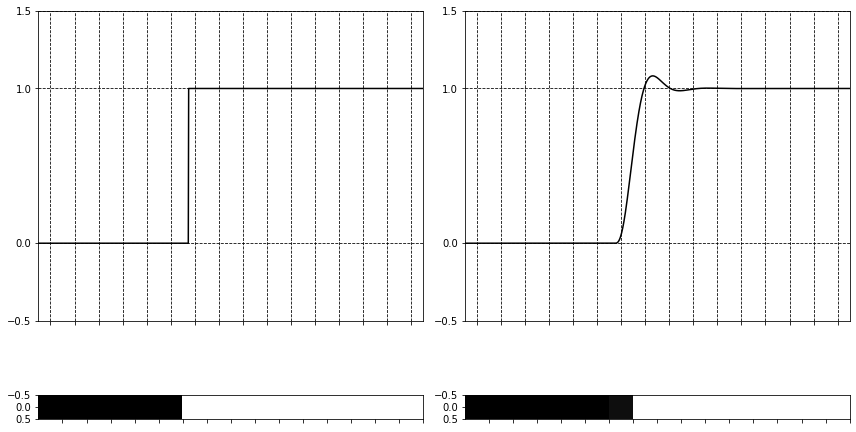

In [0]:
# Rasterization aliasing
from matplotlib import animation, rc
from IPython.display import HTML
import math

plt.rcParams['figure.figsize'] = [12, 8]

NUM_FRAMES = 400
LEN = 1024
NUM_PIX = 16
PIX_W = int(LEN / NUM_PIX)

ct_y = np.zeros(LEN)
ct_y[512::] = 1.0

fig, a = plt.subplots(2, 2)
# Unfiltered signal
a[0][0].set_xlim(0, 1024)
a[0][0].set_xticklabels([])
a[0][0].set_xticks(np.arange(PIX_W / 2, LEN, PIX_W))
a[0][0].set_ylim(-0.5, 1.5)
a[0][0].set_yticks([-0.5, 0, 1, 1.5])
a[0][0].grid(color='k', linestyle='--')

ct_0, = a[0][0].plot([], 'k')

# Filtered signal
a[0][1].set_xlim(0, 1024)
a[0][1].set_xticklabels([])
a[0][1].set_xticks(np.arange(PIX_W / 2, LEN, PIX_W))
a[0][1].set_ylim(-0.5, 1.5)
a[0][1].set_yticks([-0.5, 0, 1, 1.5])
a[0][1].grid(color='k', linestyle='--')

ct_1, = a[0][1].plot([], 'k')

# Unfiltered pixels
a[1][0].set_xticks(np.arange(0.5, 16.5))
a[1][0].set_xticklabels([])
dt_data_0 = np.empty((1, 16))
dt_0 = a[1][0].imshow(dt_data_0, cmap='gray', vmin=0, vmax=1)

# Filtered pixels
a[1][1].set_xticks(np.arange(0.5, 16.5))
a[1][1].set_xticklabels([])
dt_data_1 = np.empty((1, 16))
dt_1 = a[1][1].imshow(dt_data_1, cmap='gray', vmin=0, vmax=1)
# 
plt.tight_layout()

filter_b, filter_a = signal.butter(3, 8.0 / 512.0)

def init():
    ct_0.set_data([], [])
    ct_1.set_data([], [])
    dt_0.set_data(dt_data_0)
    dt_1.set_data(dt_data_1)
    return ct_0, ct_1, dt_0, dt_1

def sigmoid(t, sharpness):
  return 1 / (1 + np.exp(-2*sharpness*t + sharpness))
  
def animate(i):
    t = 2 * min(i, NUM_FRAMES - i) / NUM_FRAMES
    t = sigmoid(t, 10)

    ct_y = np.zeros(LEN)
    ct_y[int(400+200*t)::] = 1.0
    ct_0.set_data(np.arange(0, len(ct_y)), ct_y)
    dt_data_0 = ct_y[32::64].reshape((1, 16))
    dt_0.set_data(dt_data_0)

    ct_y = signal.lfilter(filter_b, filter_a, ct_y)
    ct_1.set_data(np.arange(0, len(ct_y)), ct_y)
    dt_data_1 = ct_y[32::64].reshape((1, 16))
    dt_1.set_data(dt_data_1)
    return ct_0, ct_1, dt_0, dt_1



anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=NUM_FRAMES, interval=20, blit=True)



HTML(anim.to_html5_video())


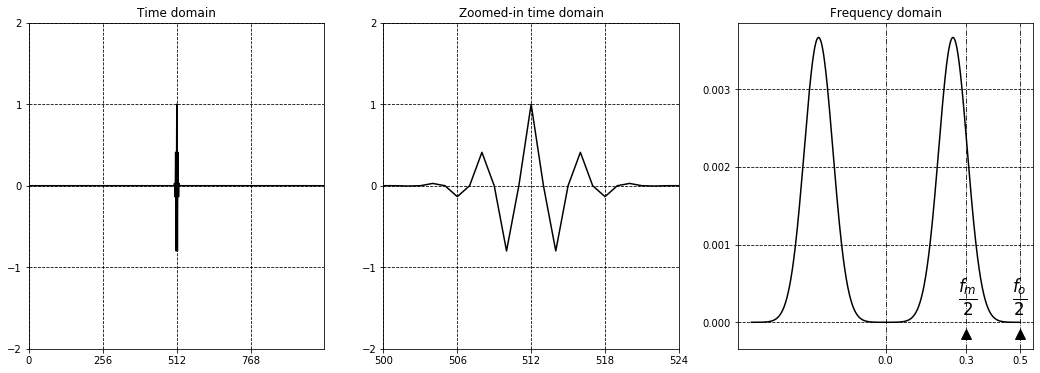

In [0]:
# Minification aliasing
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

plt.rcParams['figure.figsize'] = [18, 6]

NUM_ROWS = 1
NUM_COLS = 3
LEN = 1024

plt.figure()

# ------
# ct_x = np.linspace(0.0, 1.0, num=LEN, endpoint=False)
ct_x = np.arange(0, 1024)
ct_y = signal.gausspulse((ct_x / 1024) - 0.5, fc=256)
band_start = -0.02
band_stop = 0.02

ax = plt.subplot(NUM_ROWS, NUM_COLS, 1)
ax.set_xlim(0, 1023)
ax.set_xticks(np.arange(0, 1024, 256))
ax.set_ylim(-2, 2)
ax.set_yticks([-2, -1, 0, 1, 2])
ax.grid(color='k', linestyle='--')
ax.set_title('Time domain')
# 
ax.plot(ct_y, 'k')

# ------
ax = plt.subplot(NUM_ROWS, NUM_COLS, 2)
ax.set_xlim(500, 524)
ax.set_xticks([500, 506, 512, 518, 524])
ax.set_ylim(-2, 2)
ax.set_yticks([-2, -1, 0, 1, 2])
ax.grid(color='k', linestyle='--')
ax.set_title('Zoomed-in time domain')
# 
ax.plot(ct_y, 'k')

# ------
ct_fft = np.fft.fftshift(np.fft.fft(ct_y))
fft_x = np.linspace(-0.5, 0.5, LEN)

ax = plt.subplot(NUM_ROWS, NUM_COLS, 3)
ax.set_yticks([0, 0.001, 0.002, 0.003, 0.004])
ax.set_xticks([0, 0.3, 0.5])
ax.xaxis.grid(color='k', linestyle='-.')
ax.yaxis.grid(color='k', linestyle='--')
ax.set_title('Frequency domain')
ax.text(0.47, 0.00022, r'$\frac{f_o}{2}$', fontsize=24)
ax.plot(0.5, -0.00015, 'k^', markersize=10)
ax.text(0.27, 0.00022, r'$\frac{f_m}{2}$', fontsize=24)
ax.plot(0.3, -0.00015, 'k^', markersize=10)
# 
ax.plot(fft_x, np.abs(ct_fft) / LEN, 'k')

# ------
plt.show()
